<a href="https://colab.research.google.com/github/anh-honcharuk/3dGraphics2021/blob/main/sem_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

In [ ]:
SIZE = 224
def change_imagine_size(imagine, name):
  imagine = tf.cast(imagine, tf.float32)
  imagine = tf.image.resize(imagine, (SIZE, SIZE))
  imagine = imagine / 255.0
  return imagine, name
train_resized = train[0].map(change_imagine_size)
train_batches = train_resized.shuffle(1000).batch(16)
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([base_layers, GlobalAveragePooling2D(), Dropout(0.2), Dense(1)])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 674s 460ms/step - loss: 0.0649 - accuracy: 0.9761


In [ ]:
model.fit(train_batches, epochs=2)

Epoch 1/2
1454/1454 [==============================] - 664s 456ms/step - loss: 0.0442 - accuracy: 0.9839
Epoch 2/2
1454/1454 [==============================] - 663s 455ms/step - loss: 0.0420 - accuracy: 0.9845


In [ ]:
files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg


{'1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x15\x16\x15\x18\x16\x15\x15\x19\x18\x18\x18\x1c\x1a\x18\x18\x1a\x18\x18\x1a\x1a\x1c\x1a\x1a\x18\x18\x1a\x19\x18\x18\x18\x1a\x1c!.%\x1c\x1e+\x1f\x18\x1c&8&+/1555\x1a$;@;3?.451\x01\x0c\x0c\x0c\x10\x0f\x10\x1e\x12\x12\x1e4+$+44444464441444444446444444444444444444444444444444\xff\xc0\x00\x11\x08\x00\xf1\x00\xd1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x01\x02\x03\x04\x06\x07\x08\xff\xc4\x00;\x10\x00\x01\x03\x02\x04\x04\x03\x07\x02\x06\x02\x01\x05\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05Qaq"\x81\x91\x06\x132\xa1\xb1\xd1\xf0R\xc1\x14Bb\x82\xe1\xf1r\xa2#\x153S\x92\xb2\xff\xc4\x00\x18\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xc4\x00 \x11\x00\x02\x02\x03\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x12!1\x03A\x13"Q2\xff\xda\

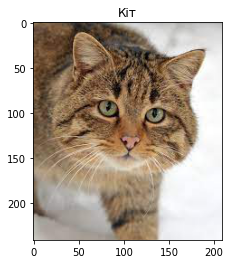

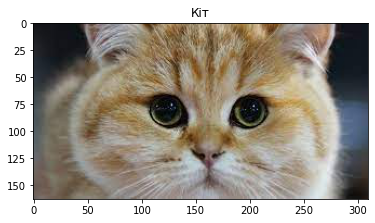

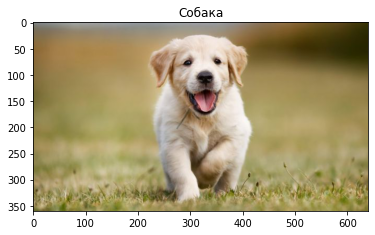

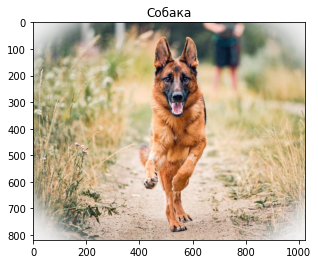

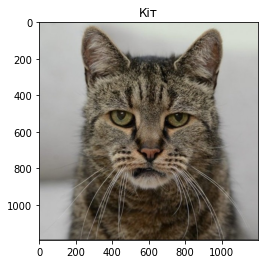

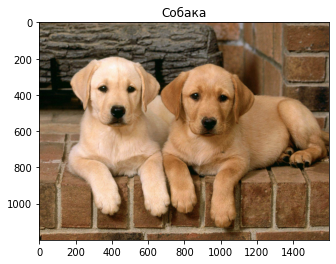

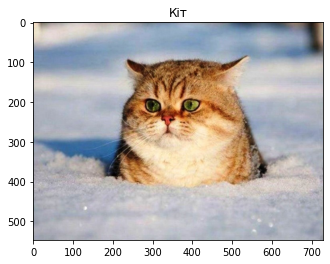

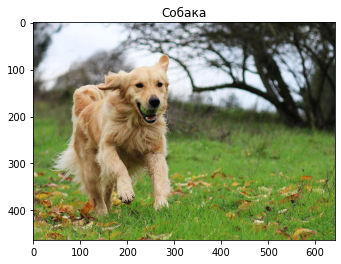

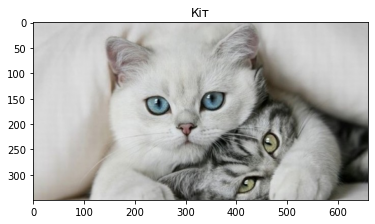

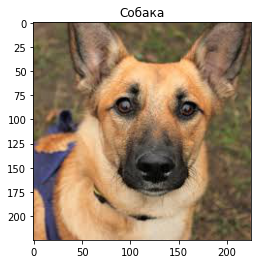

In [13]:
for i in range(10):
  image = load_img(f'{i+1}.jpg')
  array_ = img_to_array(image)
  resized_, _ = change_imagine_size(array_, _)
  expended = np.expand_dims(resized_, axis=0)
  prediction = model.predict(expended)[0][0]
  plt.figure()
  plt.imshow(image)
  plt.title(f'Кіт' if prediction < 0.0 else 'Собака')